არ დასავიწყებელი ფაქტები !
1. ნუტრიოტები შევამოწმე და მაქსიმალური რაოდენობა ერთ ცდაზე 6-ია, მეტი არ შეიძლება
2. ნუტრიოტების მინიმალური რაოდენობა არის 1, რაც ნიშნავს რომ აქ ინფო არ აკლია.
3. ჩავარდნა არ არის ახალ წელს, ჩავარდნა არის 25 დეკემბერს, მერე იწყება აღმასვლა.

1. 1g protain = 4 calories, 1g carbs = 4 caliroes, 1g fat = 9 calories
2. წონის დასაგდებად ყველაზე მნიშვნელოვანია კალორია და პროტეინი. ცხიმის მაგივრად იყენებენ კარბ.-ს
3. ერთი ნუტრიოტის შესავსებად შესაძლოა მეორეს გამოყენებაც ! 
4. უმეტესად, ნებისმიერ საჭმელში ნუტრიოტი კავშირში იქნება კარბთან, ცხიმთან ან პროტეინთან.
5. საჭმელები ბევრი შაქრით შეიცავენ ბევრ კალორიასაც.

Vitamin A – vital for skin and eyes
Vitamin C – for bone and muscle structure, as well as immune support

1?. პირდაპირ ვერ ვიტყვით იმას, რომ 1 კვირიანი შუალედებია იმ გრაფიკზე, რომელ დღეს რამდენმა დაპოსტა. კარგი დაკვირებაა საჭირო კარგ მონაკვეთზე. შესაძლოა უფრო ღრმა რამ იყოს ჩამალული )

ძააააან მაგარ გამოთქმები:
1.Eating fat will make you fat is about as scientifically logical as saying that eating tomatoes will turn you red,” writes Dr. Richard K. Bernstein, author of Dr. Bernstein’s

In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
from pandas import DataFrame
import json
import csv
import matplotlib.pyplot as plt

In [7]:
# import dataset as pandas.DataFrame
data = pd.read_csv('a.tsv', sep='\t', header=0, names=['Person', 'Date', 'Input', 'Result'])

In [8]:
data.head(5)

,Person,Date,Input,Result
0,1,2014-09-15,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2430}..."
1,1,2014-09-16,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 1862}..."
2,1,2014-09-17,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2251}..."
3,1,2014-09-18,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2001}..."
4,1,2014-09-19,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2158}..."


In [9]:
def get_real_total(data, row):
    value = get_value(data, row, 2, True)
    default = default_nutrition()
    for j in range(len(value)):
        val = value[j]['dishes']
        for i in range(len(val)):
            nutrs = val[i]['nutritions']
            for k in nutrs:
                merge_nutritions(default, k['name'], to_int(k['value']))
    return default

In [10]:
def get_foods(data, row):
    value = get_value(data, row, 2, True)
    foods = set()
    for i in range(len(value)):
        dishes = value[i]['dishes']
        for j in range(len(dishes)):
            foods.add(dishes[j]['name'])
    return foods

In [11]:
def get_persons_unique_foods(data, person):
    indexes = data.loc[data.Person == person, ['Input']].index
    foods = set()
    for i in indexes:
        foods = set.union(foods, get_foods(data, i))
    return len(foods)

In [12]:
def get_meals(data, row):
    meals = set()
    value = get_value(data, row, 2, True)
    for i in range(len(value)):
        meals.add(value[i]['meal'])
    return meals

In [13]:
def get_meals_num(data, row):
    meals = 0
    value = get_value(data, row, 2, True)
    for i in range(len(value)):
        meals += 1
    return meals

In [14]:
def get_daily_meals_num(data, date):
    answ = set()
    mask = data.Date == date
    df = data.loc[mask, ['Result']]
    for i in df.index:
        answ = set.union(answ, get_meals(data, i))
    return len(answ)

In [15]:
def is_missmatched(data, row):
    default = get_real_total(data, row)
    total = get_value(data, row, 3, True)['total']
    total_default = default_nutrition()
    for total_nutr in total:
        merge_nutritions(total_default, total_nutr['name'], total_nutr['value'])
    for key in default:
        if default[key] - total_default[key] != 0:
            return True
    return False

In [16]:
def is_negative(data, row):
    value = get_value(data, row, 2, True)
    for j in range(len(value)):
        val = value[j]['dishes']
        for i in range(len(val)):
            nutrs = val[i]['nutritions']
            for k in nutrs:
                if to_int(k['value']) < 0:
                    return True
    return False

In [17]:
def get_nutritions_sum(data, row, nutrition):
    res = 0
    cnt = 0
    value = get_value(data, row, 2, True)
    for j in range(len(value)):
        val = value[j]['dishes']
        for i in range(len(val)):
            nutrs = val[i]['nutritions']
            for nutr in nutrs:
                if nutr['name'] == nutrition:
                    res += to_int(nutr['value'])
                    cnt += 1
    return res, cnt

In [18]:
def check_proportions(data, row):
    calories = get_nutritions_sum(data, row, 'Calories')[0]
    proteins = get_nutritions_sum(data, row, 'Protein')[0]
    carbs = get_nutritions_sum(data, row, 'Carbs')[0]
    fat = get_nutritions_sum(data, row, 'Fat')[0]
    return abs(calories - 4 * proteins - 4 * carbs - 9 * fat) 

In [19]:
def person_avg_formula_diff(data, person, anomalies):
    proportions_sum = 0
    indexes = data.loc[data.Person == person, ['Date']].index
    for i in indexes:
        proportions_sum += check_proportions(data, i)
    sz = len(indexes)
    return proportions_sum / sz

In [20]:
def to_int(string):
    curr = ""
    for dig in string:
        if dig.isdigit() or dig == '-':
            curr += dig
    if len(curr) == 0:
        return -1
    return int(curr)

In [21]:
def merge_nutritions(default, key, value):
    default[key] += value

In [22]:
def default_nutrition():
    return {'Protein': 0,
     'Calories': 0,
     'Sodium': 0,
     'Sugar': 0,
     'Fat': 0,
     'Carbs': 0,
     'Fiber': 0,
     'Potass.': 0,
     'Iron': 0,
     'Calcium': 0,
     'Sat Fat': 0,
     'Chol': 0,
     'Vit A': 0,
     'Vit C': 0,
     'Trn Fat': 0,
     'Mon Fat': 0,
     'Ply Fat': 0}

In [23]:
def get_total_nutrition(data,row, nutrition):
    value = get_value(data, row, 3, True)['total']
    for nutr in value:
        if nutr['name'] == nutrition:
            return nutr['value']
    return 0

In [24]:
def get_goal_nutrition(data,row, nutrition):
    value = get_value(data, row, 3, True)['goal']
    for nutr in value:
        if nutr['name'] == nutrition:
            return nutr['value']
    return 0

In [28]:
def get_nutrition_difference(data, person, nutrition,anomalies):
    positive = 0
    negative = 0
    none = 0
    df = data.loc[data.Person == person, ['Date']]
    for i in df.index:
        dif = get_goal_nutrition(data, i, nutrition) - get_total_nutrition(data, i, nutrition)
        if dif > 0:
            positive += 1
        elif dif < 0:
            negative += 1
        else: 
            none += 1
    return positive, negative, none

In [29]:
def get_value(data, row, col, jsn):
    if jsn:
        return json.loads(data.iloc[row, col])
    else:
        return data.iloc[row, col]

In [30]:
def num_days_for_person(data, person):
    mask = data.Person == person
    return data.Person.loc[mask].shape[0]

In [31]:
def num_persons_for_date(data, date):
    mask = data.Date == date
    return data.Date.loc[mask].shape[0]

In [32]:
def get_nutritions(data, row):
    val = get_value(data, row, 2, True)
    nutritions = set()
    for j in range(len(val)):
        value = val[j]['dishes']
        for i in range(len(value)):
            nutrs = value[i]['nutritions']
            for j in range(len(nutrs)):
                nutritions.add(nutrs[j]['name'])
    return nutritions

In [33]:
def get_person_nutritions(data, person):
    mask = data.Person == person
    df = data.loc[mask, ['Person']]
    person_nutritions = set()
    for row in df.index:
        person_nutritions = set.union(person_nutritions, get_nutritions(data, row))
    return person_nutritions

In [34]:
def get_daily_average_nutritions(data, day, anomalies):
    mask = data.Date == day
    df = data.loc[mask, ['Input']]
    nutritions_sum = default_nutrition()
    nutritions_cnt = default_nutrition()
    for row in df.index:
        if row in anomalies:
            continue
        for nutrition in nutritions_sum:
            sm, cnt = get_nutritions_sum(data, row, nutrition)
            nutritions_sum[nutrition] += sm
            nutritions_cnt[nutrition] += cnt
    for nutrition in nutritions_sum:
        if nutritions_sum[nutrition] != 0:
            nutritions_sum[nutrition] /= nutritions_cnt[nutrition]
    return nutritions_sum

In [35]:
def avg_nutrition(data, person, nutrition, anomalies):
    indexes = data.loc[data.Person == person, ['Date']].index
    sm = 0
    found = False
    for i in indexes:
        if i in anomalies:
            continue
        total = get_value(data, i, 3, True)['total']
        for nutr in total:
            if nutr['name'] == nutrition:
                nutr_value = nutr['value']
                sm += nutr_value
                found = True
    if found:
        avg = sm / len(indexes)
        return avg
    else:
        return 0

In [36]:
def get_daily_average_difference(data, day, anomalies):
    mask = data.Date == day
    df = data.loc[mask, ['Result']]
    cnt = df.shape[0]
    nutritions_sum = default_nutrition()
    for row in df.index:
        if row in anomalies:
            continue
        for nutrition in nutritions_sum:
            nutritions_sum[nutrition] += abs(get_goal_nutrition(data, row, nutrition) - get_total_nutrition(data, row, nutrition))
    for nutrition in nutritions_sum:
        nutritions_sum[nutrition] /= cnt
    return nutritions_sum

In [37]:
def get_range(num):
    if num <= 50 and num != 0:
        return 0
    elif num <= 100:
        return 1
    elif num <= 150:
        return 2
    else:
        return 3

In [38]:
def increase_y_by_range(y, num):
    y[get_range(num)]+=1

In [39]:
data.nunique(axis=0, dropna=False)

Person      9896
Date         208
Input     578774
Result    581728
dtype: int64

In [40]:
y = [0,0,0,0]
unique_people = data.iloc[:, 0].unique()
for person in unique_people:
    increase_y_by_range(y, data.loc[data.Person == person, ['Person']].shape[0])

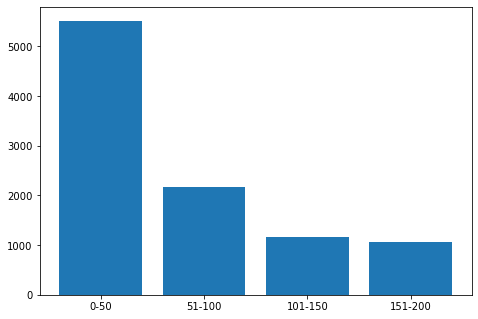

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ranges = ['0-50', '51-100', '101-150', '151-200']
ax.bar(ranges,y)
plt.show()

In [42]:
meals_distribution ={}
p_range = {}
p_meals = {}
for person in unique_people:
    mask = data.Person == person
    person_meals = set()
    person_data = data.loc[mask, ['Person']]
    for i in person_data.index:
        curr = get_meals(data, i)
        person_meals = set.union(person_meals, curr)
    n = len(person_meals)
    
    # რომელი საკვები რამდენჯერ გვხვდება
    if n in meals_distribution:
        meals_distribution[n] += 1
    else:
        meals_distribution[n] = 1
        
    # კონკრეტულმა ადამიანმა რამდენი განსხვავებული meal შეიყვანა და თითოეულმა ადამიანმა რამდენი მონაცემი შეიყვანა
    p_meals[person] = len(person_meals)
    p_range[person] = get_range(person_data.shape[0])

In [43]:
p_meals[1]

1

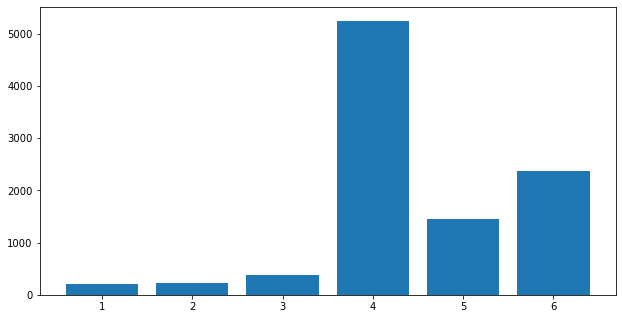

In [44]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(list(meals_distribution.keys()),list(meals_distribution.values()))
plt.show()

In [45]:
pp_meals = []
pp_range = []
for person in unique_people:
    pp_meals.append(p_meals[person])
    pp_range.append(p_range[person])
pre_data = {'persons' : unique_people, 'meals_num' : pp_meals, 'range' : pp_range}
corr_data = pd.DataFrame(data=pre_data)
corr_data.corr()

,persons,meals_num,range
persons,1.000000,0.005707,-0.001040
meals_num,0.005707,1.000000,0.222537
range,-0.001040,0.222537,1.000000


In [46]:
unique_dates = data.iloc[:, 1].unique()
unique_dates.sort()
date_people = {}
sm = 0
for date in unique_dates:
    mask = data.Date == date
    sz = data.loc[mask, :].shape[0]
    date_people[date] = sz
    sm += sz
print(sm)

587186


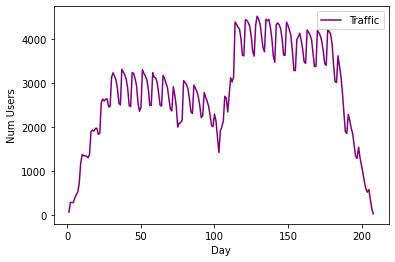

In [47]:
bla = [i for i in unique_dates]
blu = [date_people[i] for i in unique_dates]
plt.plot([i for i in range(1, 209)], blu, color='purple', label='Traffic')
plt.ylabel('Num Users')
plt.xlabel('Day')
plt.legend()
plt.show()

In [48]:
dates = []
for date in unique_dates:
    dates.append(int(date[len(date) - 2:]))
missing = 0
for i in range(1, len(dates)):
    if dates[i - 1] > dates[i]:
        if dates[i] != 1:
            missing += 1
missing

0

In [49]:
nutritions = {}
count_nutritions = {}
missmatched = []
negatives = []
for i in data.index:
    curr = get_nutritions(data, i)
    if is_missmatched(data, i):
        missmatched.append(i)
    if is_negative(data, i):
        negatives.append(i)
        
    for nutrition in curr:
        if nutrition not in count_nutritions:
            count_nutritions[nutrition]=1
        else:
            count_nutritions[nutrition]+=1
    nutritions = set.union(curr, nutritions)

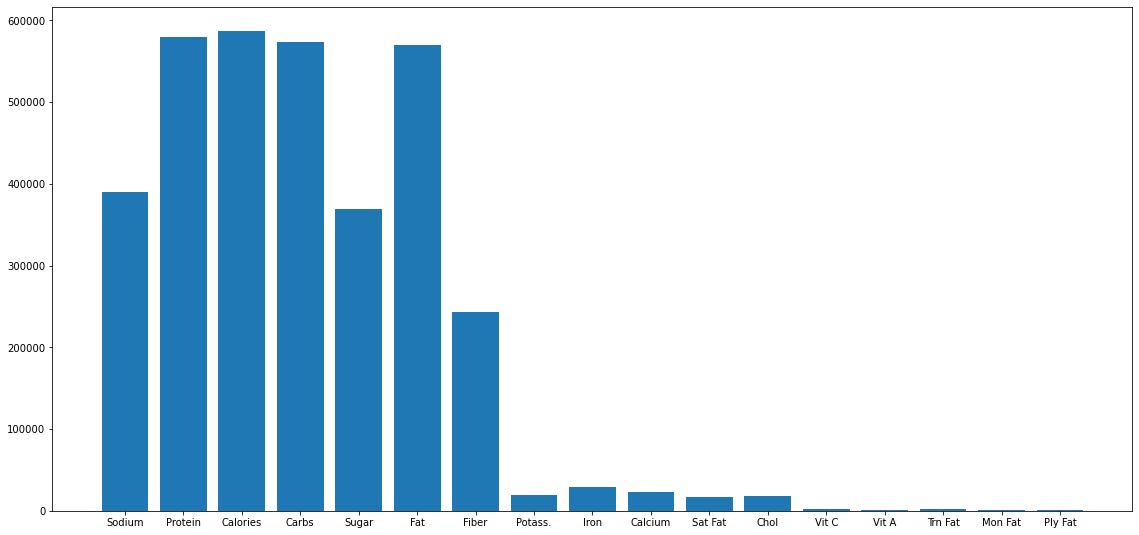

In [50]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(list(count_nutritions.keys()),list(count_nutritions.values()))
plt.show()

In [51]:
count_nutritions

{'Sodium': 390527,
 'Protein': 579872,
 'Calories': 587186,
 'Carbs': 573048,
 'Sugar': 368917,
 'Fat': 569334,
 'Fiber': 242840,
 'Potass.': 19416,
 'Iron': 29016,
 'Calcium': 22925,
 'Sat Fat': 16576,
 'Chol': 18252,
 'Vit C': 2486,
 'Vit A': 774,
 'Trn Fat': 1828,
 'Mon Fat': 428,
 'Ply Fat': 761}

In [52]:
nutritions_distribution = {}
for person in unique_people:
    person_nutritions = get_person_nutritions(data, person)
    for nutrition in person_nutritions:
        if nutrition not in nutritions_distribution:
            nutritions_distribution[nutrition] = 1
        else:
            nutritions_distribution[nutrition] += 1

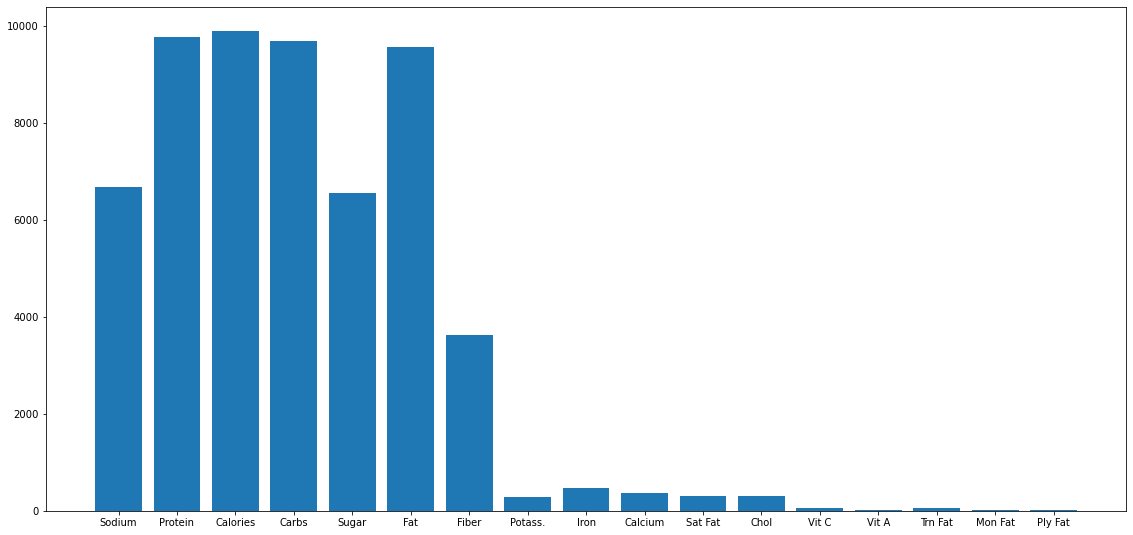

In [53]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(list(nutritions_distribution.keys()),list(nutritions_distribution.values()))
plt.show()

In [54]:
nutritions_distribution

{'Sodium': 6676,
 'Protein': 9760,
 'Calories': 9896,
 'Carbs': 9684,
 'Sugar': 6543,
 'Fat': 9569,
 'Fiber': 3629,
 'Potass.': 287,
 'Iron': 474,
 'Calcium': 372,
 'Sat Fat': 296,
 'Chol': 310,
 'Vit C': 49,
 'Vit A': 20,
 'Trn Fat': 48,
 'Mon Fat': 12,
 'Ply Fat': 14}

In [55]:
len(missmatched)

918

In [56]:
len(negatives)

1399

In [65]:
duplicated = []
anomalies = []
for i in missmatched:
    nutrs = get_nutritions(data, i)
    curr = 0
    for nutr in nutrs:
        if get_total_nutrition(data, i, nutr) != None:
            if (get_total_nutrition(data, i, nutr) * 2 == get_nutritions_sum(data, i, nutr)[0]): 
                curr = 1
            elif get_total_nutrition(data,i, nutr) != get_nutritions_sum(data, i, nutr)[0]:
                curr = 0
                break
        else:
            anomalies.append(i)
            curr = 0
            break
    if curr == 1:
        duplicated.append(i)
len(duplicated)

877

In [66]:
len(anomalies)

0

In [59]:
def get_range2(num):
    if num <= 50 and num != 0:
        return 0
    elif num <= 100:
        return 1
    elif num <= 150:
        return 2
    elif num <= 200:
        return 3
    elif num <= 250:
        return 4
    elif num <= 500:
        return 5
    else:
        return 6

In [60]:
nutritions_dif = [0, 0, 0, 0, 0, 0, 0]
for row in data.index:
    rang = get_range2(check_proportions(data, row))
    nutritions_dif[rang] += 1

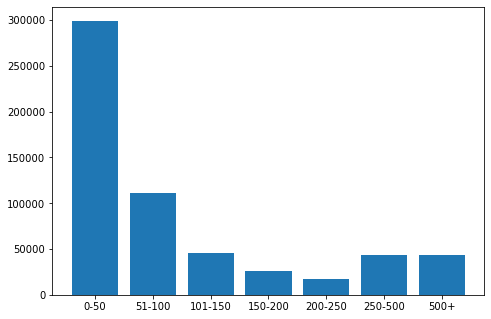

In [61]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ranges = ['0-50', '51-100', '101-150', '150-200', '200-250', '250-500', '500+']
ax.bar(ranges, nutritions_dif)
plt.show()

In [62]:
# Daysta
# unique users, unique meals, average nutritions difference, average nutritions sum

In [68]:
date_avg_nutritions = []
for date in unique_dates:
    date_avg_nutritions.append(get_daily_average_nutritions(data, date, anomalies))

In [69]:
date_avg_difference = []
for date in unique_dates:
    date_avg_difference.append(get_daily_average_difference(data, date, anomalies))

In [70]:
dictionary = {'unique_dates' : unique_dates, 'unique_users' : [date_people[i] for i in unique_dates]}
dictionary['unique_meals'] = [get_daily_meals_num(data, date) for date in unique_dates]
our_nutritions = ['Protein', 'Calories', 'Sodium', 'Sugar', 'Fat', 'Carbs', 'Fiber']
for nutrition in our_nutritions:
    indx = nutrition + '_average_sum'
    dictionary[indx] = [dic[nutrition] for dic in date_avg_nutritions]
for nutrition in our_nutritions:
    indx = nutrition + '_average_dif'
    dictionary[indx] = [dic[nutrition] for dic in date_avg_difference]
daysta = pd.DataFrame(data=dictionary)

In [71]:
daysta.to_csv('daily_data.csv')

In [72]:
people_data = {}
unique_foods = []
input_number = []
avg_daily_food = []
avg_diff_from_formula = []

for person in unique_people:
    unique_foods.append(get_persons_unique_foods(data, person))
    input_number.append(data.loc[data.Person == person, ['Date']].shape[0])
    avg_daily_food.append(unique_foods[len(unique_foods) - 1] / input_number[len(input_number) - 1])
    avg_diff_from_formula.append(person_avg_formula_diff(data, person, anomalies))
    
people_data['unique_foods'] = unique_foods
people_data['input_number'] = input_number
people_data['avg_daily_food'] = avg_daily_food 
people_data['avg_proportions_diff'] = avg_diff_from_formula

In [73]:
positive_difference = {}
negative_difference = {}
none_difference = {}
for person in unique_people:
    for nutrition in our_nutritions:
        difference = get_nutrition_difference(data, person, nutrition, anomalies)
        if nutrition not in positive_difference:
            positive_difference[nutrition] = []
            negative_difference[nutrition] = []
            none_difference[nutrition] = []
        positive_difference[nutrition].append(difference[0])
        negative_difference[nutrition].append(difference[1])
        none_difference[nutrition].append(difference[2])
for nutrition in our_nutritions:
    positive_nutrition = nutrition + '_positive' + '_difference'
    people_data[positive_nutrition] = positive_difference[nutrition]
    negative_nutrition = nutrition + '_negative' + '_difference'
    people_data[negative_nutrition] = negative_difference[nutrition]
    none_nutrition = nutrition + '_none' + '_difference'
    people_data[none_nutrition] = none_difference[nutrition]

In [75]:
nutrition_avg_val = {}
for person in unique_people:
    for nutrition in our_nutritions:
        avg = avg_nutrition(data, person, nutrition, anomalies)
        if nutrition not in nutrition_avg_val:
            nutrition_avg_val[nutrition] = []
        nutrition_avg_val[nutrition].append(avg)
for nutrition in our_nutritions:
    nutrition_avg = nutrition + '_avg'
    people_data[nutrition_avg] = nutrition_avg_val[nutrition]

In [77]:
people_dataframe = pd.DataFrame(data=people_data)
people_dataframe.to_csv('people_data.csv')